## Import Libraries

In [19]:
import os
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import random
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.optimizers.legacy import RMSprop

In [6]:
source_path = './Brain_Tumor_Image'

source_path_1 = os.path.join(source_path, '1')
source_path_2 = os.path.join(source_path, '2')
source_path_3 = os.path.join(source_path, '3')

print(f"There are {len(os.listdir(source_path_1))} images of meningioma.")
print(f"There are {len(os.listdir(source_path_2))} images of glioma.")
print(f"There are {len(os.listdir(source_path_3))} images of pituitary tumor.")

There are 708 images of meningioma.
There are 1426 images of glioma.
There are 930 images of pituitary tumor.


In [7]:
# Make directories for ImageDataGenerator
os.makedirs(os.path.join(source_path,'training'))
os.makedirs(os.path.join(source_path,'validation'))
os.makedirs(os.path.join(source_path,'training/1'))
os.makedirs(os.path.join(source_path,'training/2'))
os.makedirs(os.path.join(source_path,'training/3'))
os.makedirs(os.path.join(source_path,'validation/1'))
os.makedirs(os.path.join(source_path,'validation/2'))
os.makedirs(os.path.join(source_path,'validation/3'))

In [8]:
# Split the dataset into training and validation sets
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    file_names = os.listdir(SOURCE_DIR)
    num_of_train = int(len(file_names)*SPLIT_SIZE)
    shuffle_list = random.sample(file_names, len(file_names))

    for file in shuffle_list[:num_of_train]:
        copyfile(os.path.join(SOURCE_DIR,file), os.path.join(TRAINING_DIR,file))

    for file in shuffle_list[num_of_train:]:
        copyfile(os.path.join(SOURCE_DIR,file), os.path.join(VALIDATION_DIR,file))

In [9]:
training_dir = os.path.join(source_path, "training")
validation_dir = os.path.join(source_path, "validation")

training_1_dir = os.path.join(training_dir, "1")
validation_1_dir = os.path.join(validation_dir, "1")

training_2_dir = os.path.join(training_dir, "2")
validation_2_dir = os.path.join(validation_dir, "2")

training_3_dir = os.path.join(training_dir, "3")
validation_3_dir = os.path.join(validation_dir, "3")

split_size = 0.8

split_data(source_path_1, training_1_dir, validation_1_dir, split_size)
split_data(source_path_2, training_2_dir, validation_2_dir, split_size)
split_data(source_path_3, training_3_dir, validation_3_dir, split_size)

## Visualizing some samples

Sample meningioma image:


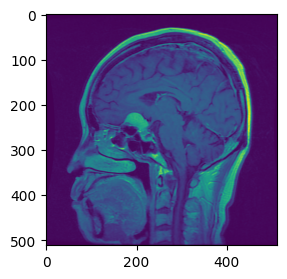


Sample glioma image:


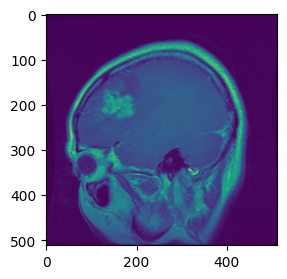


Sample pituitary tumor image:


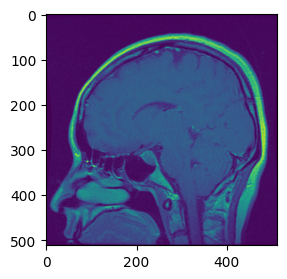

In [10]:
plt.figure(figsize=(3,3))
print("Sample meningioma image:")
plt.imshow(load_img(f"{os.path.join(source_path_1, os.listdir(source_path_1)[0])}"))
plt.show()

plt.figure(figsize=(3,3))
print("\nSample glioma image:")
plt.imshow(load_img(f"{os.path.join(source_path_2, os.listdir(source_path_2)[0])}"))
plt.show()

plt.figure(figsize=(3,3))
print("\nSample pituitary tumor image:")
plt.imshow(load_img(f"{os.path.join(source_path_3, os.listdir(source_path_3)[0])}"))
plt.show()

In [13]:
sample_image  = load_img(f"{os.path.join(training_1_dir, os.listdir(training_1_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (512, 512, 3)


## Training and Validation Generators

In [14]:
'''
# Training dataset with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
'''
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(120, 120))


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(120, 120))

Found 2450 images belonging to 3 classes.
Found 614 images belonging to 3 classes.


## Create CNN Model

In [16]:
def create_model():


    model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(120,120,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation='relu'),
          #tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(3,activation='softmax')

    ])


    model.compile(optimizer =RMSprop(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


    return model

In [17]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
77/77 [==============================] - 26s 338ms/step - loss: 0.7429 - accuracy: 0.6694 - val_loss: 0.5280 - val_accuracy: 0.7964
Epoch 2/15
77/77 [==============================] - 26s 333ms/step - loss: 0.4671 - accuracy: 0.8029 - val_loss: 0.3609 - val_accuracy: 0.8485
Epoch 3/15
77/77 [==============================] - 26s 331ms/step - loss: 0.3670 - accuracy: 0.8465 - val_loss: 0.5152 - val_accuracy: 0.7801
Epoch 4/15
77/77 [==============================] - 26s 335ms/step - loss: 0.2719 - accuracy: 0.8845 - val_loss: 0.2395 - val_accuracy: 0.9007
Epoch 5/15
77/77 [==============================] - 26s 335ms/step - loss: 0.2050 - accuracy: 0.9163 - val_loss: 0.2401 - val_accuracy: 0.9039
Epoch 6/15
77/77 [==============================] - 26s 342ms/step - loss: 0.1414 - accuracy: 0.9482 - val_loss: 0.2350 - val_accuracy: 0.9055
Epoch 7/15
77/77 [==============================] - 26s 341ms/step - loss: 0.1150 - accuracy: 0.9576 - val_loss: 0.3099 - val_accuracy: 0.8779

## Visualize Results

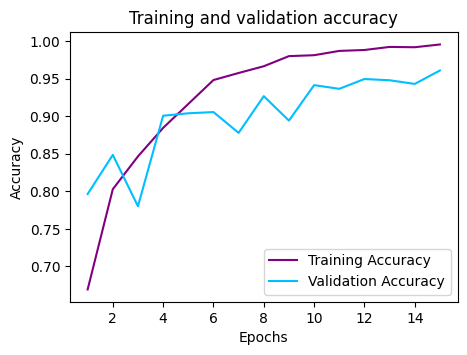

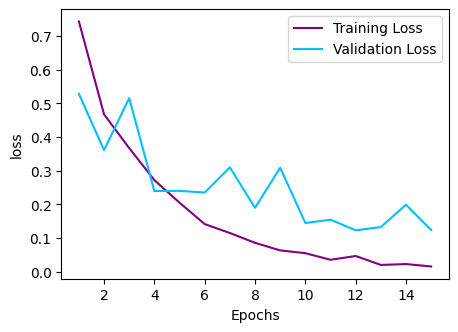

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs=range(len(acc)) # Get number of epochs
epochs = np.arange(len(acc))+1


# Plot training and validation accuracy per epoch
plt.figure(figsize=(5,3.5))
plt.plot(epochs, acc, 'purple')
plt.plot(epochs, val_acc, 'deepskyblue')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()
print("")


# Plot training and validation loss per epoch
plt.figure(figsize=(5,3.5))
plt.plot(epochs, loss, 'purple')
plt.plot(epochs, val_loss, 'deepskyblue')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()